In [13]:
from segment_anything import automatic_mask_generator, SamAutomaticMaskGenerator, SamPredictor, sam_model_registry
#from skimage import io
#import colorcet as cc
import matplotlib.pyplot as plt
import numpy as np
from multilabel import masks_to_label, label_to_masks

In [9]:
im =io.imread("images/blobs.png")
#im_rgb = np.dstack((im, im, im))
# uncomment to download the model
#!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

sam=sam_model_registry["vit_b"]("sam_vit_b_01ec64.pth")
sam.to(device="cuda")
mask_generator = SamAutomaticMaskGenerator(sam,points_per_side=128)
masks = mask_generator.generate(im)

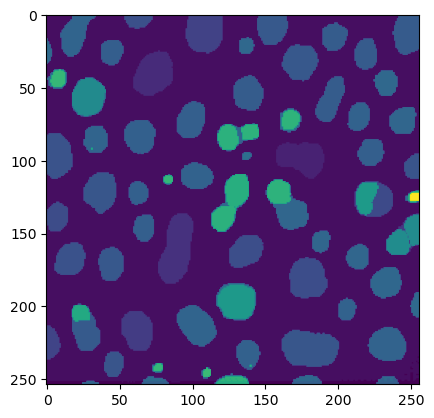

In [10]:
label_image = masks_to_label(masks)
fig, axs = plt.subplots(1,1)
axs.imshow(label_image, cmap="viridis", norm="log") # Holy ugly.

In [25]:
label_image.max()

109496258

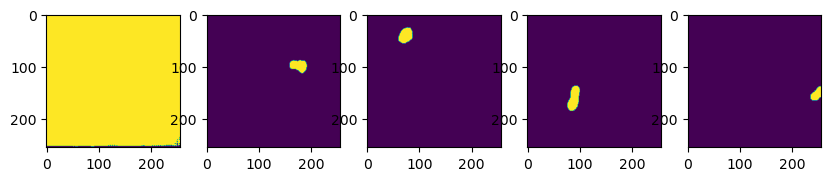

In [12]:
new_masks = label_to_masks(label_image)
fig, axs = plt.subplots(1,5, figsize=(10,10))
for enum, mask in enumerate(new_masks):
    if enum >= 5:
        break
    axs[enum].imshow(mask)

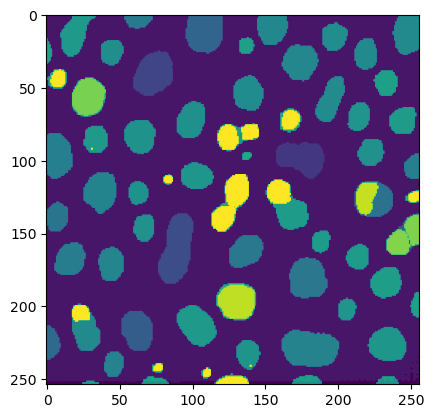

In [95]:
from PIL import Image
data = Image.fromarray(label_image)
#data.save("blobs_label.png")
sv = plt.imread("blobs_label.png")
plt.imshow(sv, norm="log")

(256, 254)

In [104]:
label_image

array([[  1,   2,   2, ..., 206, 206, 206],
       [  2,   2,   2, ..., 206, 206, 206],
       [  2,   2,   2, ..., 206, 206, 206],
       ...,
       [  1,   2,   2, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1]], dtype=int32)

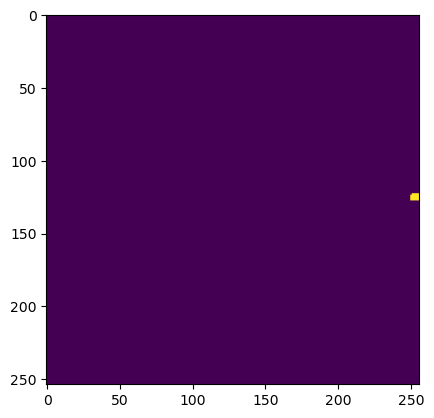

In [53]:
plt.imshow(sv)

In [22]:
import pickle
pickle.dump([mask["segmentation"] for mask in masks], "pickled_masks")

TypeError: file must have a 'write' attribute